In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk/original.csv


In [2]:
df_train=pd.read_csv('/kaggle/input/credit-risk/original.csv')

In [3]:
df_train.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
df_train.size

10000

In [5]:
df_train.columns

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')

In [6]:
df_train.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [8]:
df_train.count()

clientid    2000
income      2000
age         1997
loan        2000
default     2000
dtype: int64

In [9]:
df_train['default']

0       0
1       0
2       0
3       0
4       1
       ..
1995    0
1996    0
1997    1
1998    0
1999    0
Name: default, Length: 2000, dtype: int64

In [10]:
df_train.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [11]:
df_train['age']

0       59.017015
1       48.117153
2       63.108049
3       45.751972
4       18.584336
          ...    
1995    48.518179
1996    23.162104
1997    28.017167
1998    63.971796
1999    56.152617
Name: age, Length: 2000, dtype: float64

In [12]:
df_train.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [13]:
df_train["age"]=df_train["age"].fillna(df_train['age'].median())

In [14]:
df_train.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
df_train_len=len(df_train)

In [17]:
test=df_train[:df_train_len]
test.drop(labels=["default"],axis=1,inplace=True)
test.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,clientid,income,age,loan
0,1,66155.925095,59.017015,8106.532131
1,2,34415.153966,48.117153,6564.745018
2,3,57317.170063,63.108049,8020.953296
3,4,42709.534201,45.751972,6103.642260
4,5,66952.688845,18.584336,8770.099235


In [18]:
train=df_train[:df_train_len]
X_train=train.drop(labels=["default"],axis=1)
y_train=train["default"]
X_train,X_test ,y_train,y_test=train_test_split(X_train,y_train,test_size=0.33,random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 1340
X_test 660
y_train 1340
y_test 660
test 2000


In [19]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
acc_log_train=round(logreg.score(X_train,y_train)*100,2)
acc_log_test=round(logreg.score(X_test,y_test)*100,2)
print("Training Accuray:% {}".format(acc_log_train))
print("Testing Accuray:% {}".format(acc_log_test))

Training Accuray:% 91.42
Testing Accuray:% 91.21


In [20]:

random_state=42
classifier=[DecisionTreeClassifier(random_state=random_state),
           SVC(random_state=random_state),
           RandomForestClassifier(random_state=random_state),
           LogisticRegression(random_state=random_state),
           KNeighborsClassifier()]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
svc_param_grid={"kernel":["rbf"],
               "gamma":[0.001,0.01,0.1,1],
               "C":[1,10,50,100,200,300,1000]}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}
logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}
knn_param_grid={"n_neighbors":np.linspace(1,19,10,dtype=int).tolist(),
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan"]}
classifier_param=[dt_param_grid,
                 svc_param_grid,
                 rf_param_grid,
                 logreg_param_grid,
                 knn_param_grid]
cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.9761194029850746
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8619402985074627
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.4min finished


0.9843283582089551
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.1s finished


0.9186567164179106
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.2s


0.8582089552238805


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.1s finished


Text(0.5, 1.0, 'Cross Validation Score')

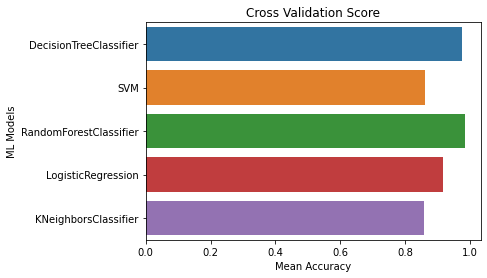

In [21]:
import seaborn as sns
cv_results=pd.DataFrame({"Cross Validation Means":cv_result,"ML Models":["DecisionTreeClassifier","SVM","RandomForestClassifier","LogisticRegression","KNeighborsClassifier"]})
g=sns.barplot("Cross Validation Means","ML Models",data=cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Score")

In [22]:
votingC=VotingClassifier(estimators=[("dt",best_estimators[0]),
                                     ("rfc",best_estimators[2]),
                                     ("lr",best_estimators[3])],
                                      voting="soft",n_jobs=-1)
votingC=votingC.fit(X_train,y_train)
print('Highest Precison:',100*accuracy_score(votingC.predict(X_test),y_test))

Highest Precison: 97.72727272727273
